# CascadeBandit-UCB

In [1]:
import sys
import os 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
from random import  randrange, betavariate, shuffle
from numpy.random import uniform, choice
import math 
from  tqdm import tqdm, trange
from utils import *
from cascade_ucb import CascadeUCB
%load_ext autoreload

%autoreload 2

## Single run

In [4]:
number_of_rounds =  int(1e5)
p = 0.2
delta  = 0.15
L = 8
K = 2
weights = [p for i in range(K)] + [np.abs(p-delta) for i in range(L-K)]
#shuffle(weights)

cascade_model = CascadeUCB(number_of_rounds,L,K)
dataset = generate_data(number_of_rounds, weights)

# initializing
cascade_model.initialize(dataset,weights)

# training
for t in trange(1,number_of_rounds) :
    cascade_model.one_round(t,dataset)


100%|██████████| 99999/99999 [00:08<00:00, 12166.25it/s]


# Analysis

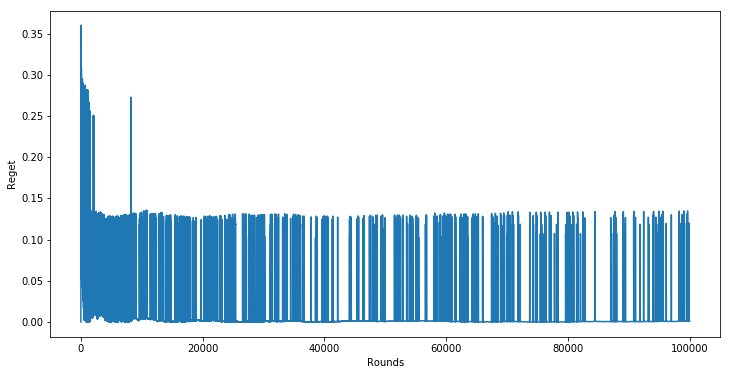

In [6]:
regrets = pd.Series(cascade_model.regrets)
plt.figure(figsize=(12, 6))
plt.plot(regrets)
plt.ylabel("Reget")
plt.xlabel("Rounds")
plt.savefig('convergence')
plt.show()

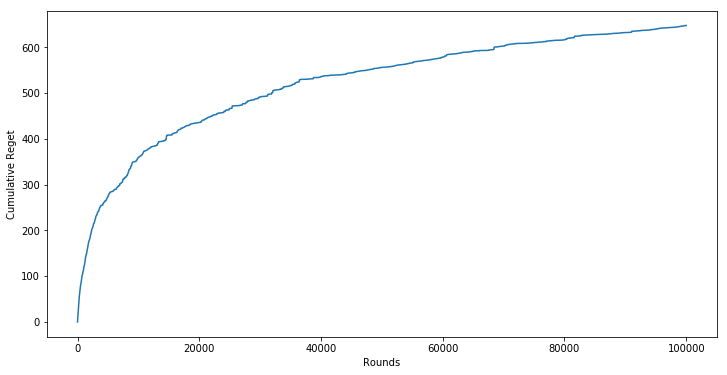

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(regrets))
plt.ylabel("Cumulative Reget")
plt.xlabel("Rounds")
plt.show()

## Cumulative item selections

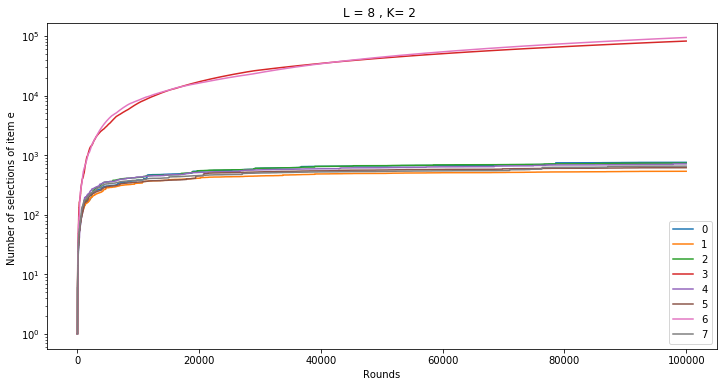

In [63]:
cascade_model.T = pd.DataFrame(cascade_model.T)
fig, ax = plt.subplots(figsize=(12,6))
plt.yscale('log')
ax.plot(cascade_model.T)
ax.legend(cascade_model.T)
plt.title("L = 8 , K= 2 ")
plt.ylabel("Number of selections of item e ")
plt.xlabel("Rounds")
plt.savefig('nbitems')
plt.show()

## Experiment with multiple runs

In [40]:
# Hyperparams
list_L =[16,16,16,8]
list_K =[2,4,4,2]
list_delta = [0.15,0.15,0.075,0.075]
n_runs = 5
p=0.2
number_of_rounds =  int(1e2)

In [41]:
res , n_regret = run_experiment(list_L, list_delta, list_K, number_of_rounds,n_runs,p)

L= 8 , K= 2,delta =0.075: 100%|██████████| 5/5 [00:00<00:00, 76.36it/s]


In [42]:
res

,L,K,delta,mean,std
0,16,2,0.150,24.096475,2.540551
1,16,4,0.150,29.094590,4.761885
2,16,4,0.075,20.042619,1.931034
3,8,2,0.075,15.488652,1.809575
